## Graph #4: Residuals vs. Leverage 

We come now to the final graph in our series. The *residuals vs. leverage* graph will be our tool of choice for identifying *outliers* and *leverage points* that can corrupt the results of our analysis. First, let's discuss *outliers* - an *outlier* is any point with a very large residual, such as the point at `x=25` below:

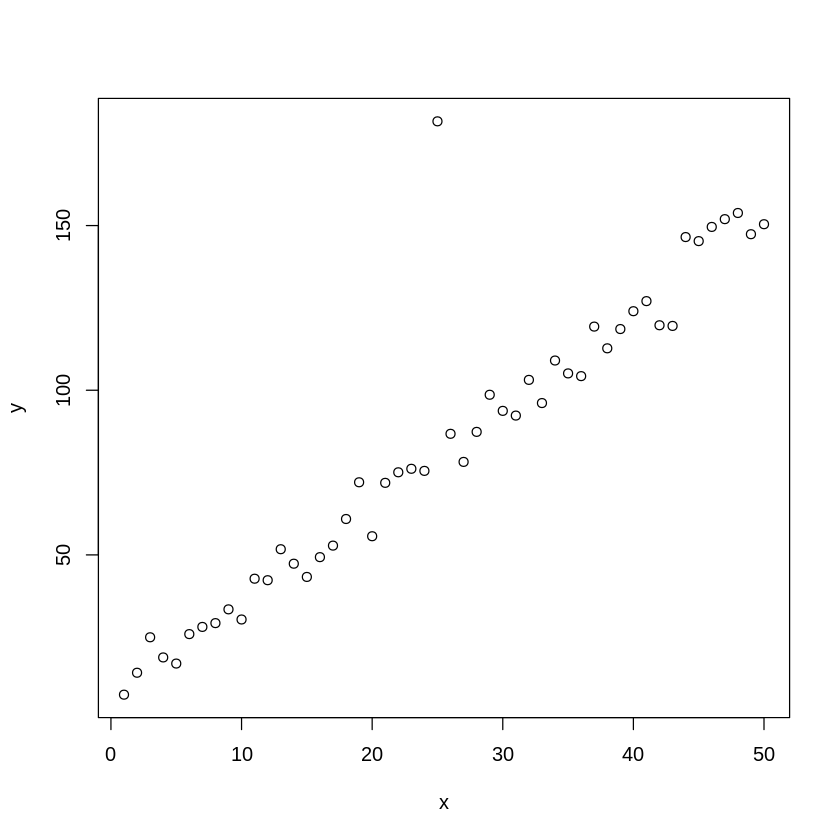

In [1]:
outliers.df <- read.csv("data/outliers.csv")
plot(y ~ x, data=outliers.df)
p <- recordPlot()

Let's examine the effect of this point on our model:

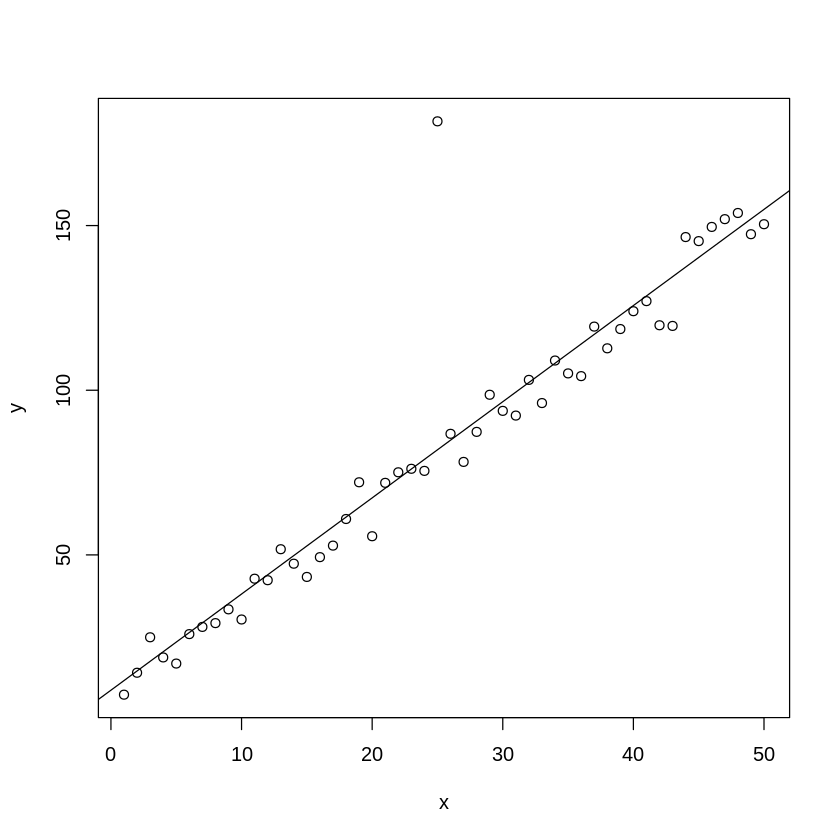

In [2]:
model <- lm(y ~ x, data=outliers.df)
replayPlot(p)
abline(model)

The residuals vs. fits plot can be very helpful for locating outliers, especially when we have included multiple independent variables in our regression model:

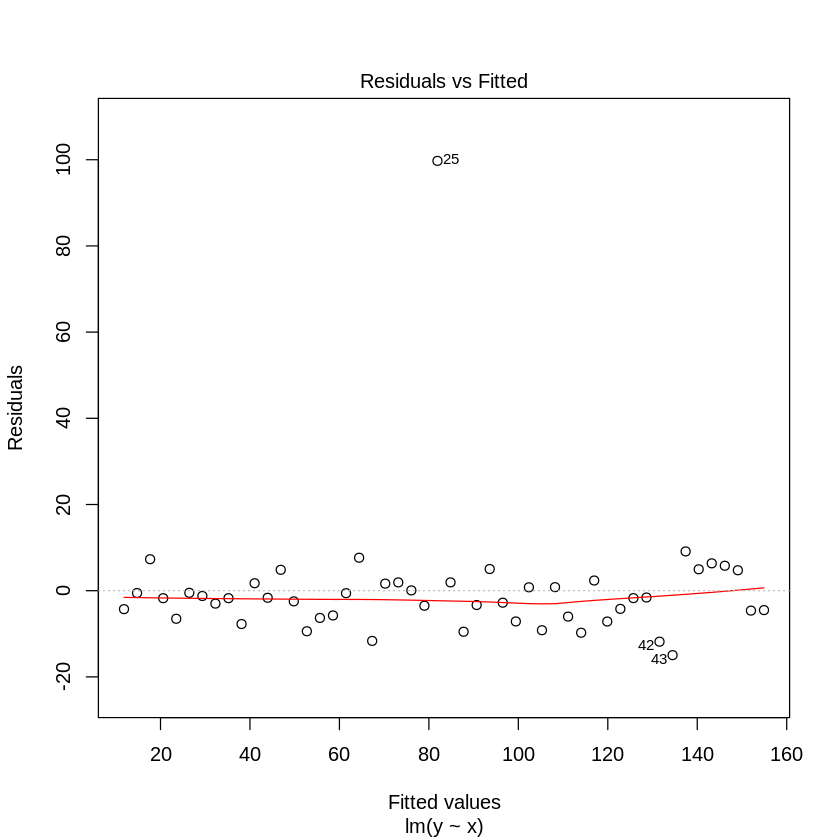

In [3]:
plot(model, which=1)

We can see that R quite helpfully labels our outlier with the appropriate row number `25`, which helps us to locate and examine it. 

## Leverage Points

Suppose that instead of being very widely displaced along the `y` axis (giving it a large residual) the outlier above was instead widely displaced along the `x` axis, as shown below:

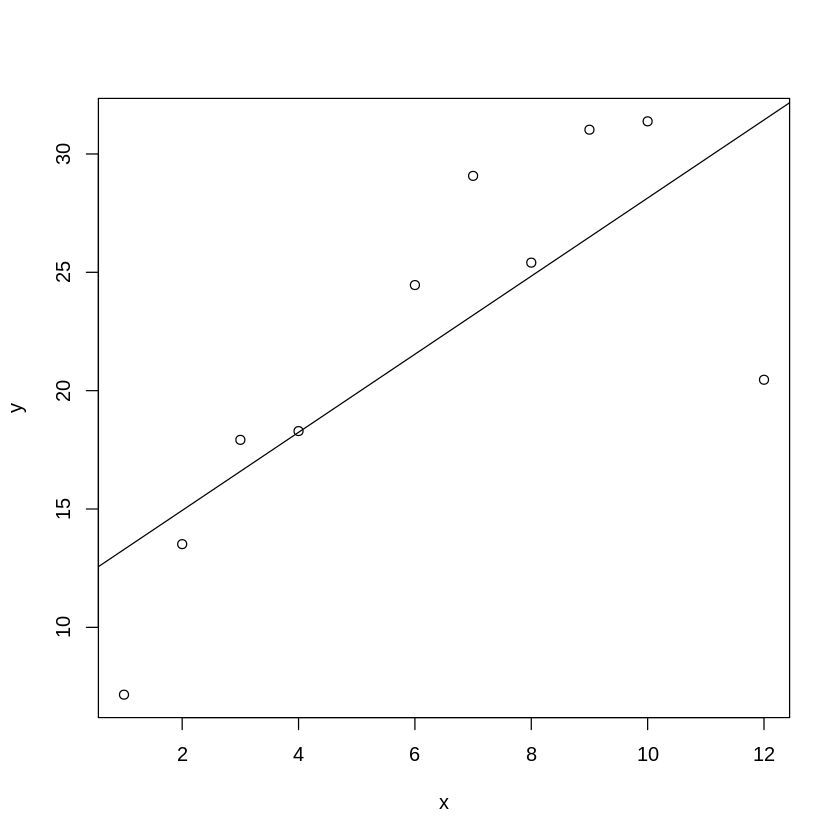

In [4]:
leverage.df <- read.csv("data/leverage.csv")
model.leverage <- lm(y ~ x, data=leverage.df)
plot(y ~ x, data=leverage.df)
abline(model.leverage)

We say that the point located near `x=12` is a *leverage point*. Leverage points are points with independent variable values very far from the other points in our dataset. Leverage points bend the regression line towards themselves in a dramatic fashion - therefore, care should be taken to identify them and consider whether including them in the analysis is reasonable.  Leverage points are often also outliers, but this is not always the case. 

To illustrate the dramatic impact of our leverage point, we will remove it, refit our regression model, and show how dramatically the resulting line differs from the original:

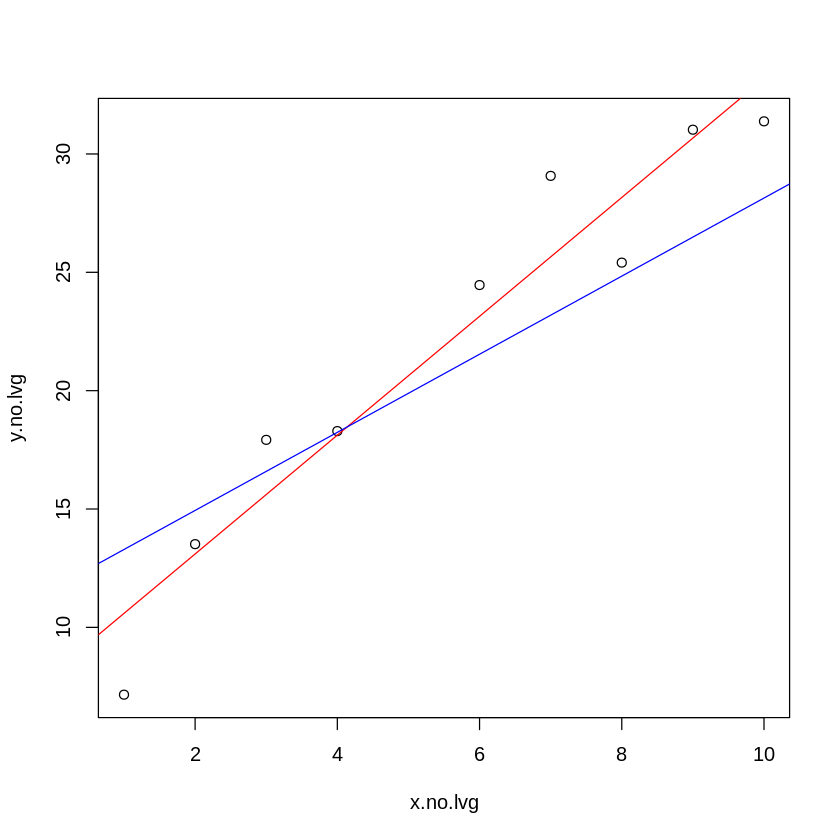

In [5]:
x.no.lvg <- leverage.df[,'x'][-5]
y.no.lvg <- leverage.df[,'y'][-5]
model.no.lvg <- lm(y.no.lvg ~ x.no.lvg)
plot(y.no.lvg ~ x.no.lvg)
abline(model.no.lvg, col="red")
abline(model.leverage, col="blue")

As you can see, removing the leverage point transforms the blue line into the red line, which has a dramatically different slope. Depending on our business context, it is quite possible that the red line will yield much more accurate predictions than the blue line, and in such cases removing the leverage point from our analysis would be a very good thing. For example, perhaps we are analyzing the impact of store size (*x*) on store sales (*y*) - however, the store in row `5` was under renovation for half the year and thus had significantly lower revenue than one would expect. In this case, it would likely be best to exclude this influential, high-leverage point from our analysis. 

What is the best way to identify leverage points? Examining the residuals vs. fits plot for this case identifies three outliers, of which the point in row `5` is the most egregious:

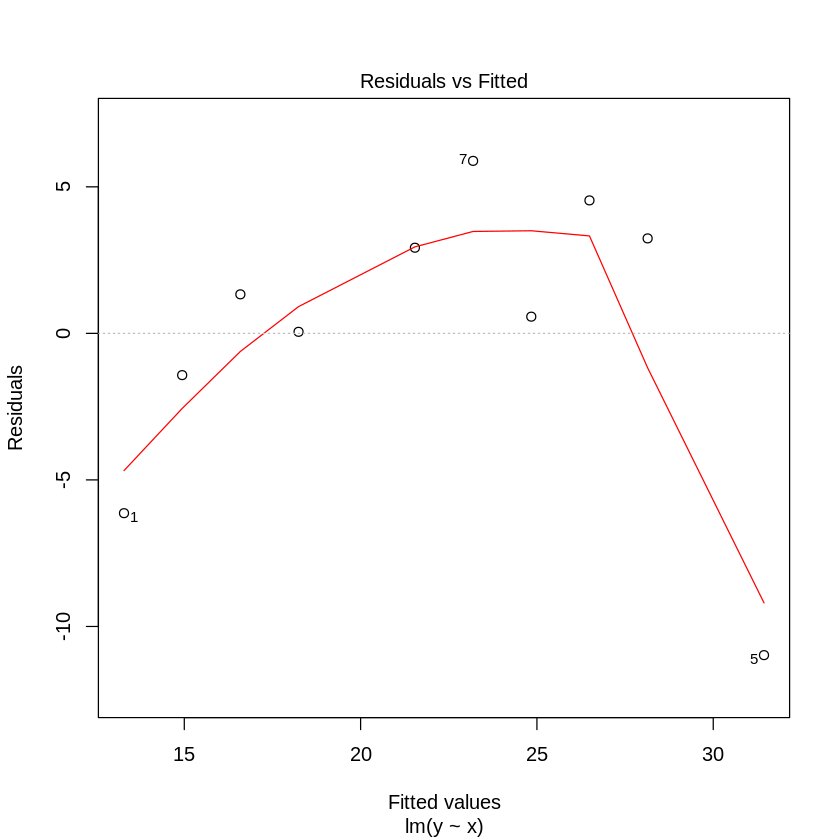

In [6]:
plot(model.leverage, which=1)

However, this plot does not clearly indicate the degree to which this point is exerting influence on our fit. For this purpose, we will examine the `Residuals vs. Leverage` plot generated below:

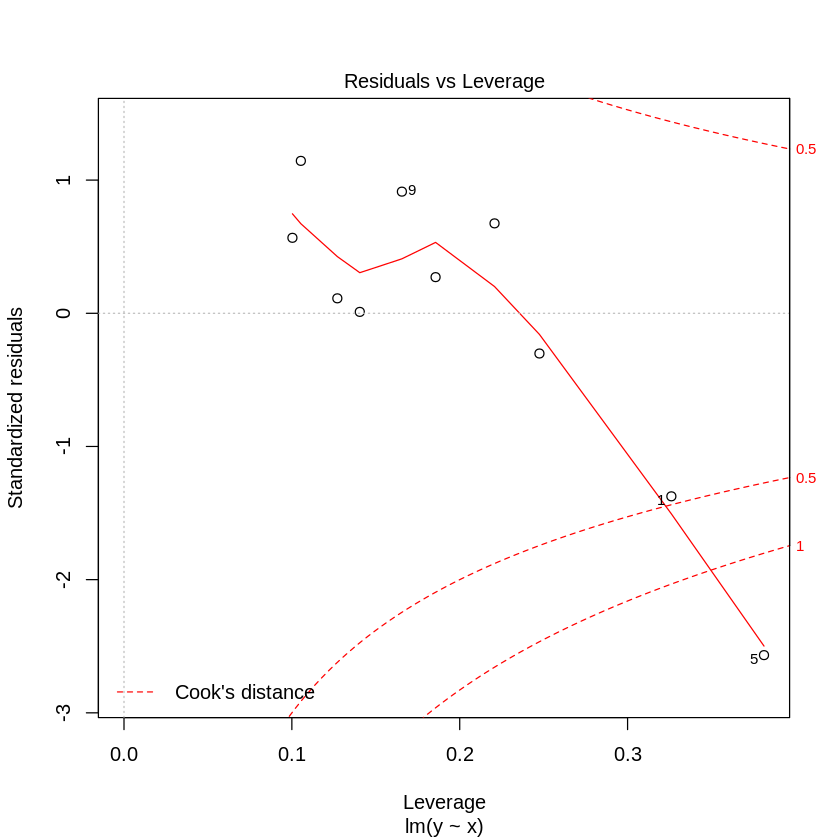

In [7]:
plot(model.leverage, which=5)

The key features of the plot above are the `Cook's distance` red contour lines, labeled with `0.5` and `1`. The `Cook's distance` metric is a measure of how much a given point influences our regression line - points with Cook's distance values greater than 0.5 are considered influential and points with Cook's distance values greater than 1 are considered extremely influential. We can see that our point `(x[5], y[5])` is clearly identified as a highly influential point that is quite likely distorting the results of our analysis. 

<span style="color:blue;font-weight:bold">Exercise</span>: Now you will get to try out using the Residuals vs. Leverage plot to locate an influential point. Perform the following actions:

1. Load the data contained in the file `"data/attrition.csv"` into the variable `attrition.df`
2. Create a linear model of the relationship `attrition ~ employee.morale` and store it in the variable `model.attrition`
3. Use the argument `which=5` as shown above to create a Residuals vs. Leverage plot. 
4. Set the variable `influential.row.number` to the row number of the most influential point

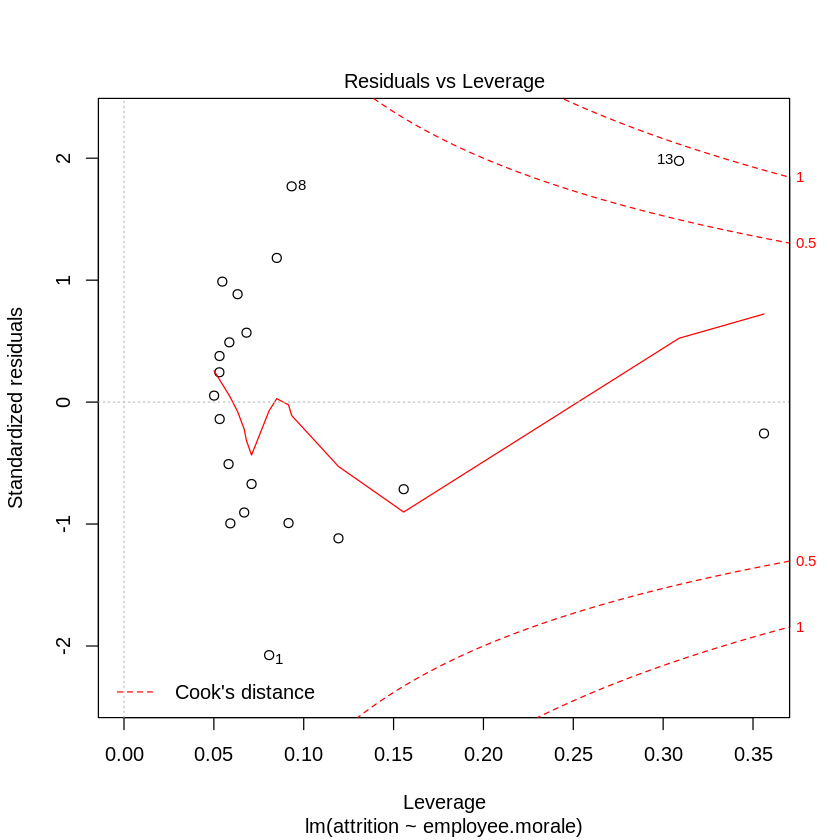

In [12]:
# delete this entire line and replace it with your code

attrition.df <- read.csv('data/attrition.csv')
model.attrition <- lm(attrition ~ employee.morale, data=attrition.df)

plot(model.attrition, which=5)

influential.row.number <- 13

In [13]:
correct.attrition.df <- read.csv("data/attrition.csv")
check.variable.value("attrition.df", correct.attrition.df)
check.variable.definition("model.attrition")
correct.model.attrition <- lm("attrition ~ employee.morale", data=attrition.df)
assert.true(all(coefficients(model.attrition) == coefficients(correct.model.attrition)), "Did you set <code>model.attrition</code> correctly?")
check.variable.value("influential.row.number", 13)
success()

Correct!